In [95]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import socket
import struct
import math 
import sys, time
import pickle
import numpy as np
from IPython.display import Image as IPImage
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
%matplotlib inline

In [91]:
def load_dataset():
    
        
    fIm = open('/Users/louis/Documents/Virtual_car_data/images2.p', 'r')
    fIn = open('/Users/louis/Documents/Virtual_car_data/inputs2.p', 'r')
    X_train = pickle.load(fIm)/255.
    y_train = pickle.load(fIn)
    
    H = X_train.shape[1]
    W = X_train.shape[2]
    ch = X_train.shape[3]
    
    X_train = X_train.reshape(-1,ch,H,W)
    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.uint8)
    
    return X_train, y_train, H, W, ch

def deprocess(x):
    
    x = x.reshape(H,W,ch)
    x = x*255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

X_train, y_train, H, W, ch = load_dataset()

In [120]:
ch = 3
H = 22
W = 75

net1 = NeuralNet(
    #layers=[('input', layers.InputLayer),
    #        ('conv2d1', layers.Conv2DLayer),
    #        ('dense', layers.DenseLayer),
    #        ('output', layers.DenseLayer),
    #        ],
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, ch, H, W),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=32,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=3,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=25,
    verbose=1,
    )

In [121]:
net1.load_params_from('virtual_car_trained.np')

Loaded parameters to layer 'conv2d1' (shape 32x3x5x5).
Loaded parameters to layer 'conv2d1' (shape 32).
Loaded parameters to layer 'conv2d2' (shape 32x32x5x5).
Loaded parameters to layer 'conv2d2' (shape 32).
Loaded parameters to layer 'dense' (shape 960x32).
Loaded parameters to layer 'dense' (shape 32).
Loaded parameters to layer 'output' (shape 32x3).
Loaded parameters to layer 'output' (shape 3).


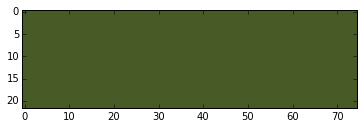

[2]


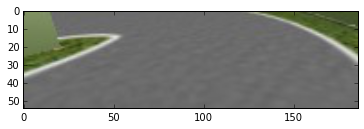

ValueError: The hardcoded shape for the number of rows in the image (22) isn't the run time shape (54).
Apply node that caused the error: ConvOp{('imshp', (3, 22, 75)),('kshp', (5, 5)),('nkern', 32),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'valid'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (3, 22, 75)),('kshp_logical', (5, 5)),('kshp_logical_top_aligned', True)}(input.input, conv2d1.W)
Toposort index: 3
Inputs types: [TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(1, 3, 54, 186), (32, 3, 5, 5)]
Inputs strides: [(120528, 40176, 744, 4), (300, 100, 20, 4)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{(i0 * (Abs((i1 + i2)) + i1 + i2))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, ConvOp{('imshp', (3, 22, 75)),('kshp', (5, 5)),('nkern', 32),('bsize', None),('dx', 1),('dy', 1),('out_mode', 'valid'),('unroll_batch', None),('unroll_kern', None),('unroll_patch', True),('imshp_logical', (3, 22, 75)),('kshp_logical', (5, 5)),('kshp_logical_top_aligned', True)}.0, InplaceDimShuffle{x,0,x,x}.0)]]

Backtrace when the node is created:
  File "/usr/local/lib/python2.7/site-packages/lasagne/layers/conv.py", line 499, in get_output_for
    border_mode=border_mode)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [125]:
# replace localhost with network name of game machine defined in game blend
HOST, PORT_SND = "localhost", 9999

# SOCK_DGRAM is the socket type to use for UDP sockets
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
ch = 3
nt = 0
while True:
    nt +=1
    Xim = plt.imread('/Users/louis/Documents/BGE_UDP/frame.jpg')
    plt.imshow(Xim)
    plt.show()
    Xim = Xim.reshape(-1,ch,Xim.shape[0],Xim.shape[1])
    preds = net1.predict(Xim[0:1])
    print preds
    data = pickle.dumps(preds)
    sock.sendto(data, (HOST, PORT_SND))
    time.sleep(0.3)
    if nt==2:
        clear_output()
        nt = 0

In [103]:
preds = net1.predict(X_train[3:200])
print preds
#plt.imshow(deprocess(X_train[120]))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [27]:
Xim.shape

(1, 3, 75, 22)

In [104]:
Xim = plt.imread('/Users/louis/Documents/BGE_UDP/frame.jpg')
#plt.imshow(Xim)
#plt.show()
Xim = Xim.reshape(-1,ch,Xim.shape[0],Xim.shape[1])
preds = net1.predict(Xim[0:1])

print preds
print Xim[0:1].shape

[2]
(1, 3, 22, 75)


In [105]:
Xim = plt.imread('/Users/louis/Documents/BGE_UDP/frame.jpg')
#plt.imshow(Xim)
#plt.show()

In [77]:
Xim = Xim.reshape(-1,ch,Xim.shape[0],Xim.shape[1])

In [78]:
Xim.shape

(1, 3, 22, 75)